In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
plt.rcParams['figure.figsize']= (10, 6)

df = pd.read_csv('Sample - Superstore.csv')

df.head()

# Check that csv file has been read properly

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [69]:
df['Ship Date'] = pd.to_datetime(df['Ship Date']) # Changes the ship date data column to a datetime object

df['year'] = df['Ship Date'].dt.to_period('Y')

 # df = df.drop('4') # DELETE 2018 ROW - VERY LITTLE DATA - NEED TO FIGURE OUT HOW TO GET THIS TO WORK

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year
0,1,CA-2016-152156,11/8/2016,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,11/8/2016,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,6/12/2016,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,10/11/2015,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,10/11/2015,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


In [70]:
# Profit over time date frame

profitVsTime = df.groupby('year')['Profit'].sum().reset_index() # Gets the sum of profit for each month

profitVsTime.columns = ['year', 'Profit'] # Changes the column names 

profitVsTime.head()


,year,Profit
0,2014,47292.7255
1,2015,62881.5299
2,2016,82941.1017
3,2017,92346.8752
4,2018,934.7894


<Axes: xlabel='year', ylabel='Profit'>

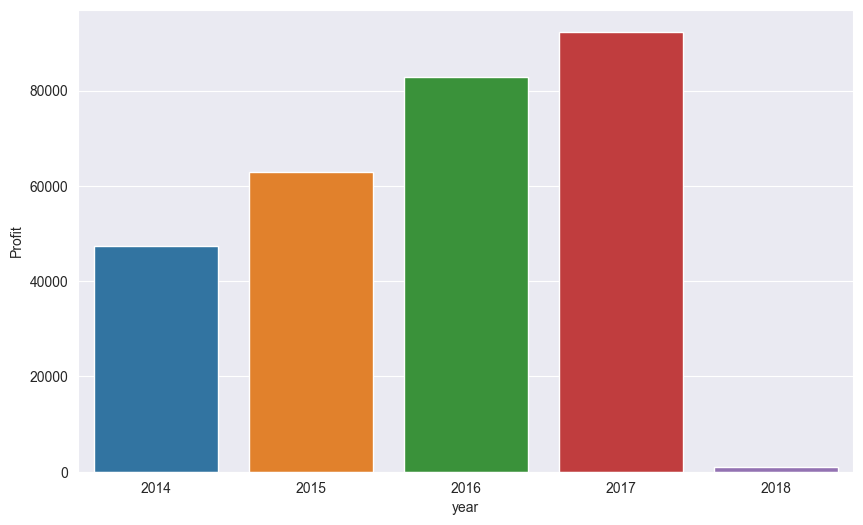

In [71]:
# Profit over time graph

sns.barplot(data=profitVsTime, x='year', y='Profit', hue = 'year')

In [72]:
# Sales over time data frame

salesVsTime = df.groupby('year')['Sales'].sum().reset_index() # Gets the sum of sales for each month

salesVsTime.columns = ['year', 'Sales'] # Changes the column names 

salesVsTime.head()

,year,Sales
0,2014,470383.1931
1,2015,479442.5020
2,2016,611325.7530
3,2017,730889.7154
4,2018,5159.6968


<Axes: xlabel='year', ylabel='Sales'>

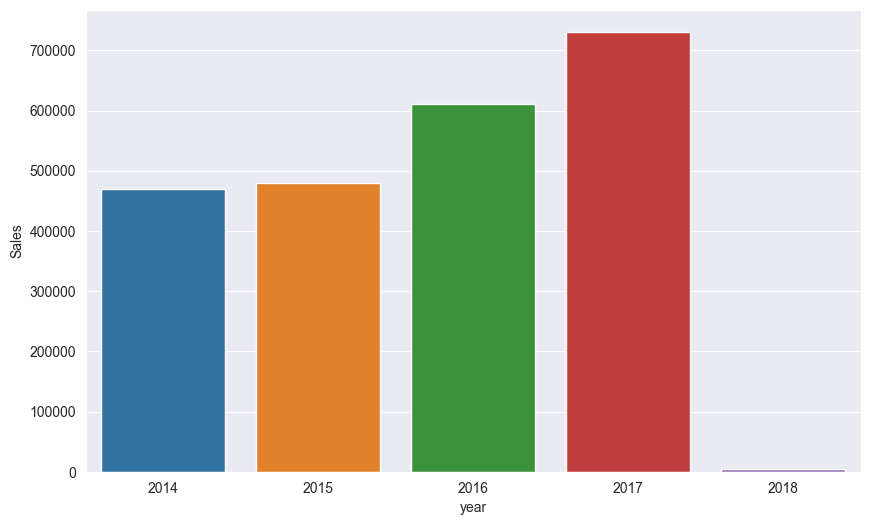

In [73]:
# sales over time graph

sns.barplot(data=salesVsTime, x='year', y='Sales', hue='year')



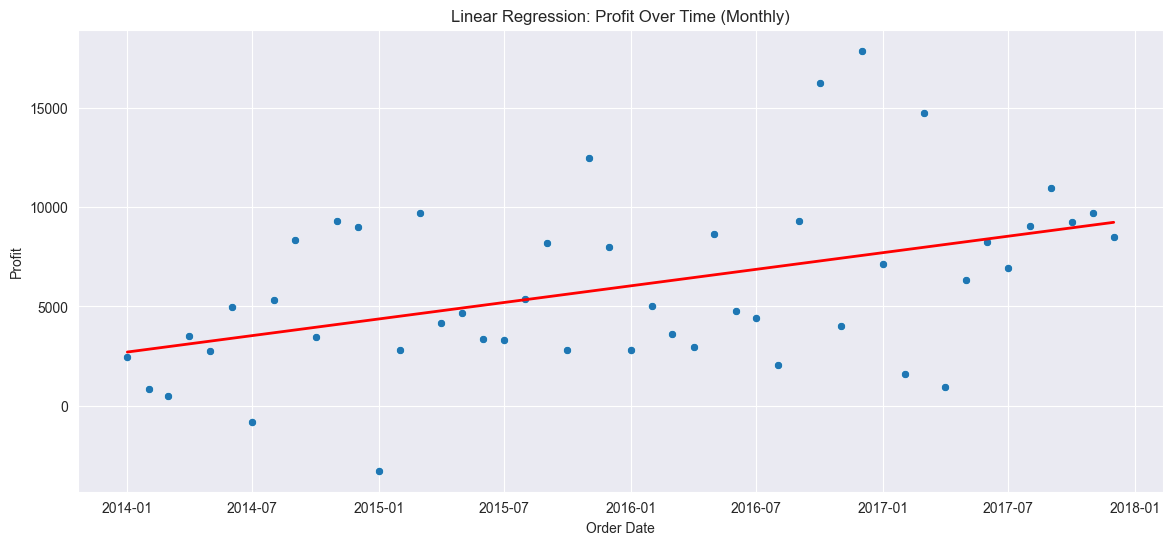

In [46]:
#Linear Regression for total profit over time - monthly
df = df.sort_values('Order Date')

df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month

#group by year and month and agg sum
monthly_data = df.groupby(['year', 'month']).agg({'Profit': 'sum', 'Sales': 'sum'}).reset_index()

#linear regression for total profits over time, agg over monthly
profit_time_model = LinearRegression()
X_profit = pd.to_datetime(monthly_data[['year', 'month']].assign(day=1)).apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y_profit = monthly_data['Profit'].values
profit_time_model.fit(X_profit, y_profit)

#plot linear regression
plt.figure(figsize=(14, 6))
sns.scatterplot(x=pd.to_datetime(monthly_data[['year', 'month']].assign(day=1)), y='Profit', data=monthly_data)
plt.plot(pd.to_datetime(monthly_data[['year', 'month']].assign(day=1)), profit_time_model.predict(X_profit), color='red', linewidth=2)
plt.title('Linear Regression: Profit Over Time (Monthly)')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.show()

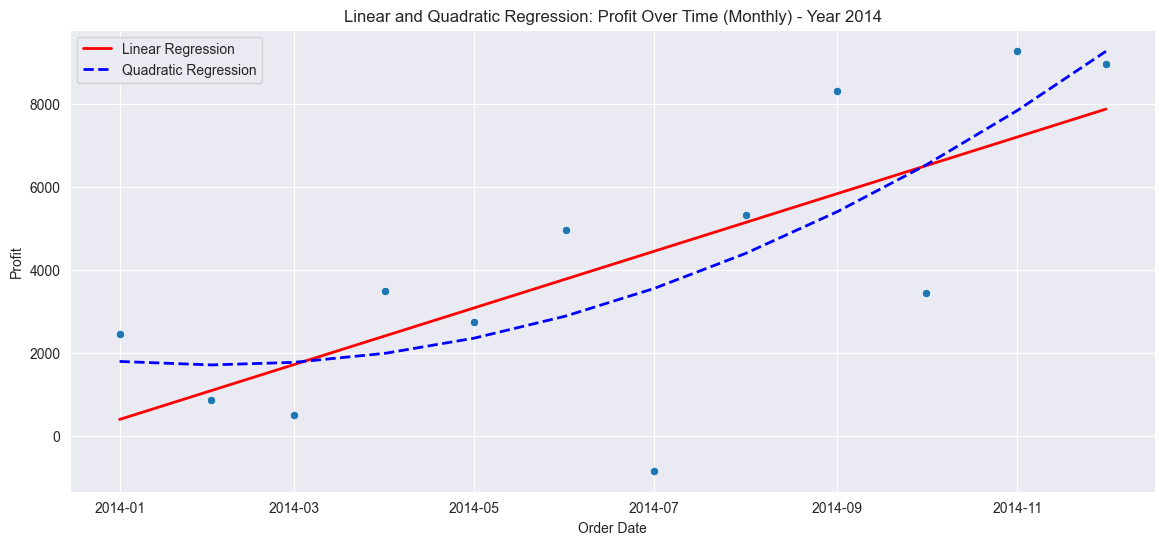

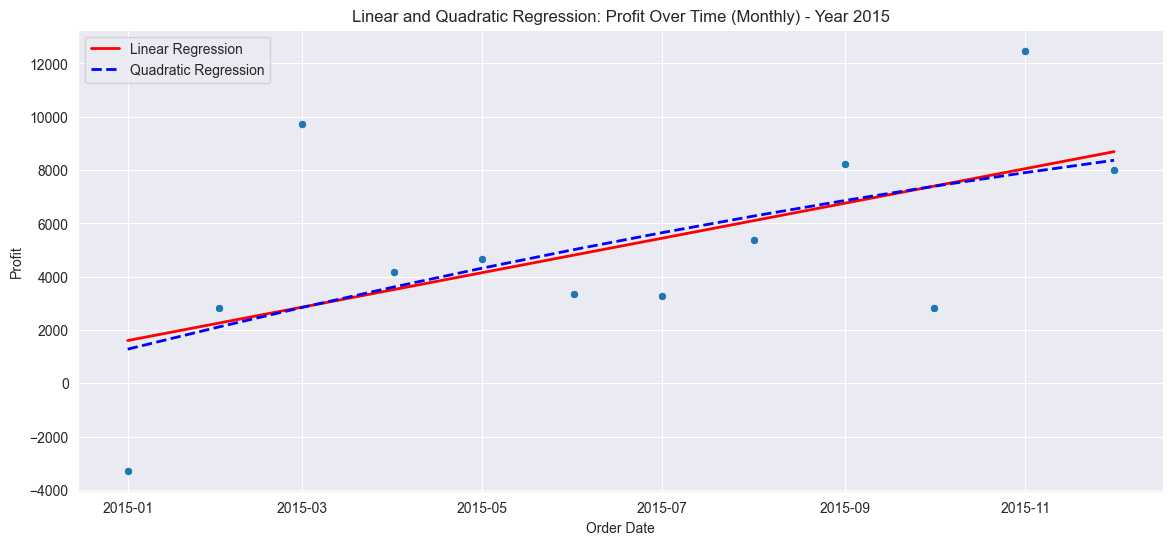

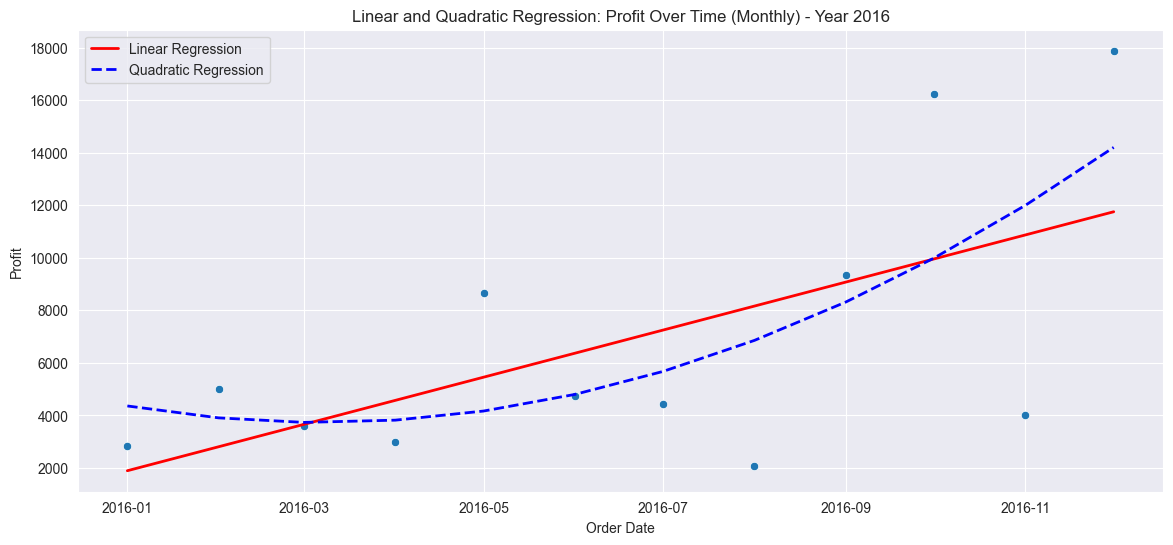

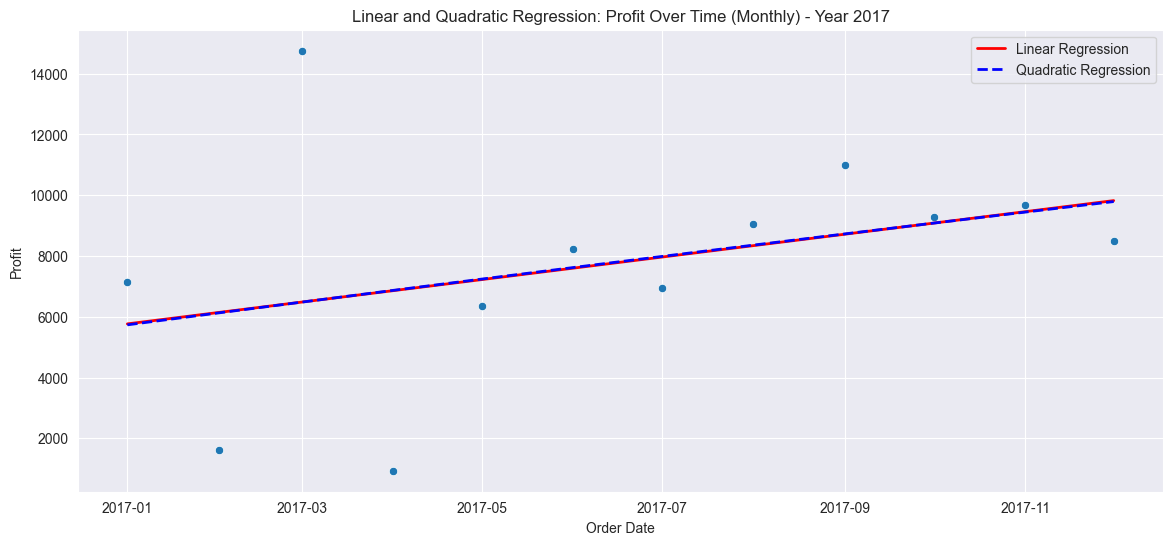

In [47]:
#linear and polynomial regression separated by year
from sklearn.preprocessing import PolynomialFeatures

df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month

#group by year and month and calculate the sum of profits and sales
monthly_data = df.groupby(['year', 'month']).agg({'Profit': 'sum', 'Sales': 'sum'}).reset_index()

#get unique years and iterate
unique_years = df['year'].unique()

for year in unique_years:
    #filter data for specific year
    year_data = monthly_data[monthly_data['year'] == year]
    
    #linear regression for Profit over time
    profit_time_model = LinearRegression()
    X_profit = pd.to_datetime(year_data[['year', 'month']].assign(day=1)).apply(lambda x: x.timestamp()).values.reshape(-1, 1)
    y_profit = year_data['Profit'].values
    profit_time_model.fit(X_profit, y_profit)

    #quadratic regression for Profit over time
    quadratic_features = PolynomialFeatures(degree=2)
    X_quadratic = quadratic_features.fit_transform(X_profit)
    quadratic_model = LinearRegression()
    quadratic_model.fit(X_quadratic, y_profit)

    #plot graphs
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x=pd.to_datetime(year_data[['year', 'month']].assign(day=1)), y='Profit', data=year_data)
    plt.plot(pd.to_datetime(year_data[['year', 'month']].assign(day=1)), profit_time_model.predict(X_profit), color='red', linewidth=2, label='Linear Regression')
    plt.plot(pd.to_datetime(year_data[['year', 'month']].assign(day=1)), quadratic_model.predict(quadratic_features.transform(X_profit)), '--', color='blue', linewidth=2, label='Quadratic Regression')
    plt.title(f'Linear and Quadratic Regression: Profit Over Time (Monthly) - Year {year}')
    plt.xlabel('Order Date')
    plt.ylabel('Profit')
    plt.legend()
    plt.show()

In [52]:
# USE THIS CELL TO CALCULATE PERCENT PROFIT - proft/sales x 100%

precentProfit = df['Profit'].sum()/df['Sales'].sum()*100
print(f'Percent Profit: {precentProfit.round(2)}%')

Percent Profit: 12.47%


In [75]:
# Sales by region data frame

salesByRegion = df.groupby('Region')['Sales'].sum().reset_index() # Gets the sum of sales by region

salesByRegion.columns = ['Region', 'Sales'] # Changes the column names 

salesByRegion.head()

,Region,Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


<Axes: xlabel='Region', ylabel='Sales'>

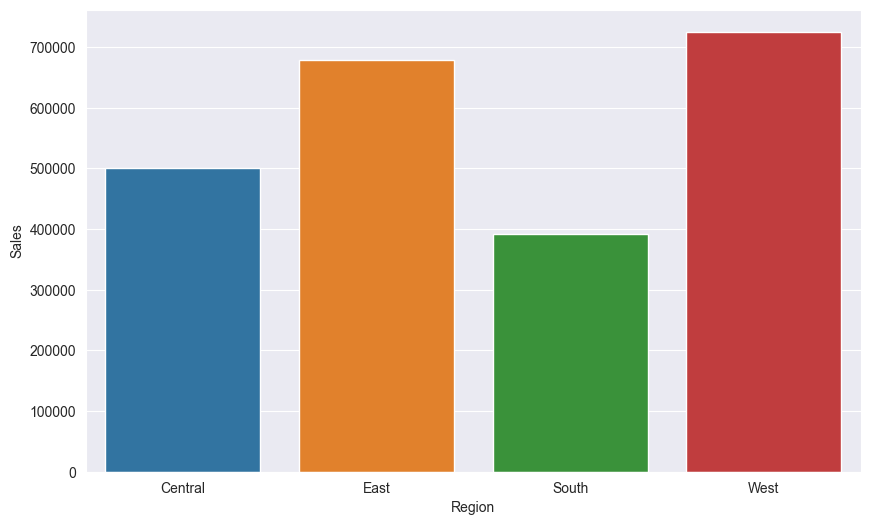

In [76]:
# Sales by region graph

sns.barplot(data=salesByRegion, x='Region', y='Sales', hue='Region')

In [77]:
# Sales by State data frame

salesByState= df.groupby('State')['Sales'].sum().reset_index() # Gets the sum of sales by state

salesByState.columns = ['State', 'Sales'] # Changes the column names 

salesByState.head()

,State,Sales
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457687.6315
4,Colorado,32108.1180


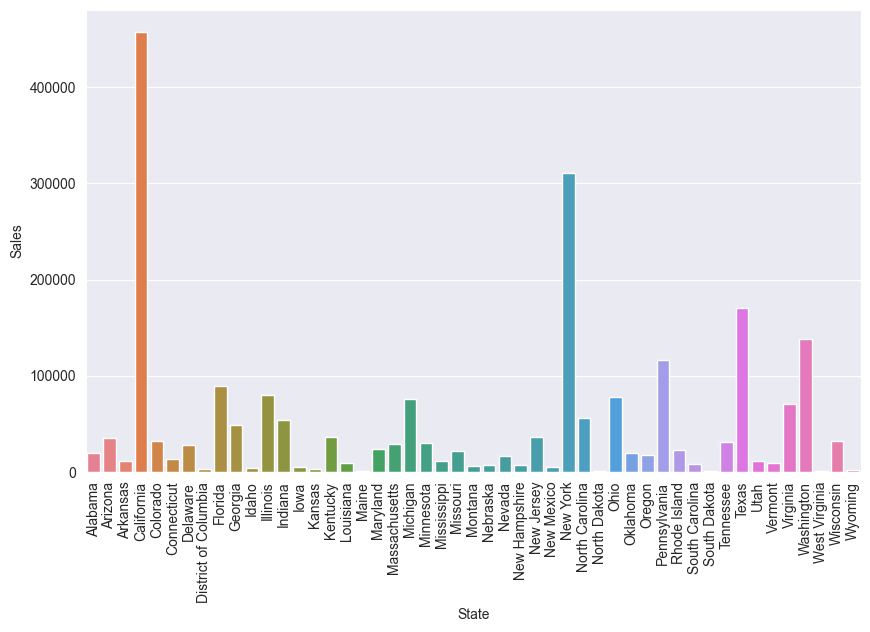

In [78]:
# Sales by state graph

salesVsStateGraph = sns.barplot(data=salesByState, x='State', y='Sales', hue='State')

for state in salesVsStateGraph.get_xticklabels():
    state.set_rotation(90)

In [79]:
# Sales by City
# Author: Tommy
df['City'].value_counts()

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64

In [80]:
# There are 531 cities which is too many to plot, so we will look at the top 10 cities for total sales
salesByCity = df.groupby('Sales')['City'].sum().reset_index()
topSalesByCity = salesByCity.sort_values(by='Sales', ascending=False)[0:10]
topSalesByCity

,Sales,City
5824,22638.480,Jacksonville
5823,17499.950,Lafayette
5822,13999.960,Seattle
5821,11199.968,New York City
5820,10499.970,Newark
5819,9892.740,Detroit
5818,9449.950,Minneapolis
5817,9099.930,Lakewood
5816,8749.950,Arlington
5815,8399.976,Philadelphia


Text(0.5, 1.0, 'Sales by City')

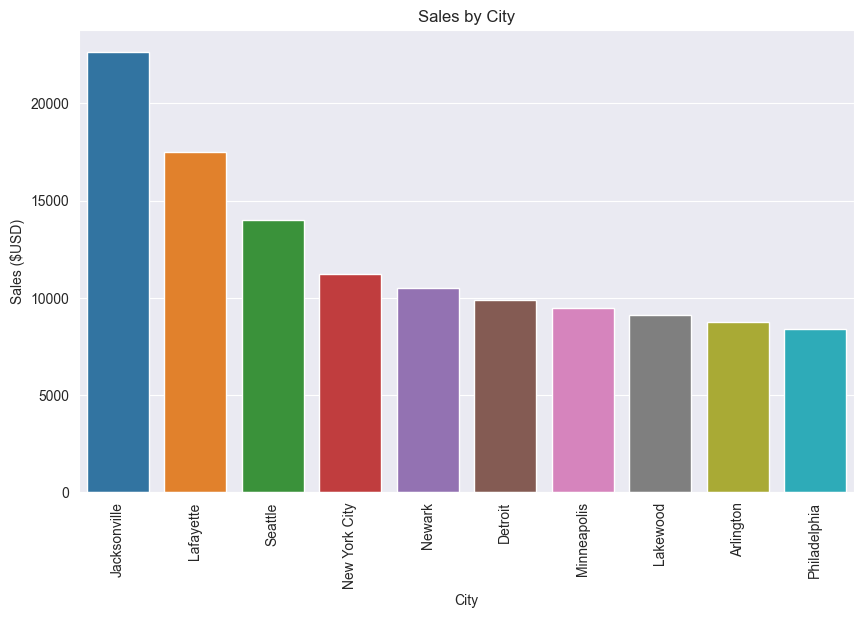

In [81]:
sns.barplot(topSalesByCity, x='City', y='Sales', hue='City')
plt.xticks(rotation=90)
plt.ylabel('Sales ($USD)')
plt.title('Sales by City')

In [82]:
# Sales by segment - Consumer, corporate, home office, etc
# Author - Tommy

salesBySegment = df.groupby('Segment')['Sales'].sum().reset_index()
salesBySegment.head()

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


Text(0.5, 1.0, 'Total Sales by Segment')

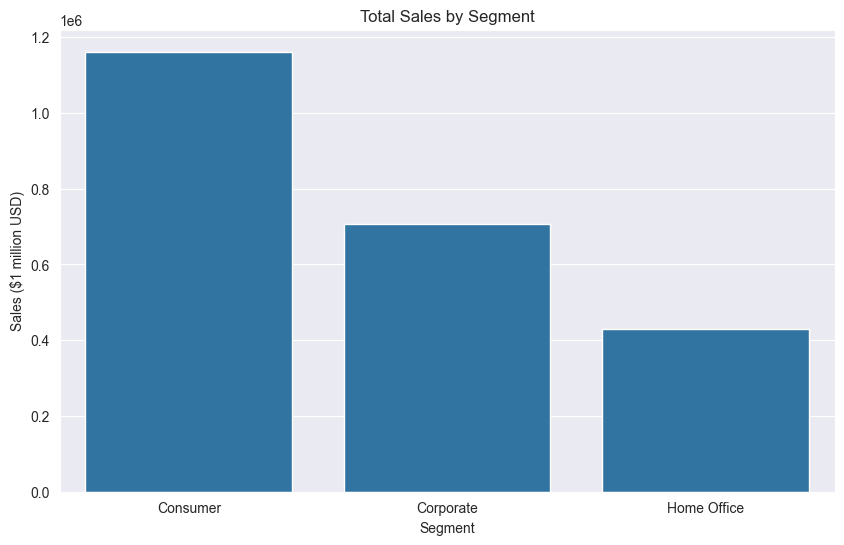

In [83]:
sns.barplot(salesBySegment, x='Segment', y='Sales')
plt.ylabel('Sales ($1 million USD)')
plt.title('Total Sales by Segment')

In [84]:
# Average profit per item sold by segment

In [85]:
# Number of sales by category

In [86]:
# Gross sales vs profit for each category

In [87]:
# Number of days to deliver for standard class

In [88]:
# Number of days to deliver for second class

In [89]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year
0,1,CA-2016-152156,11/8/2016,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,11/8/2016,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,6/12/2016,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,10/11/2015,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,10/11/2015,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   object        
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## Total sales for each sub-category
Author: Tommy

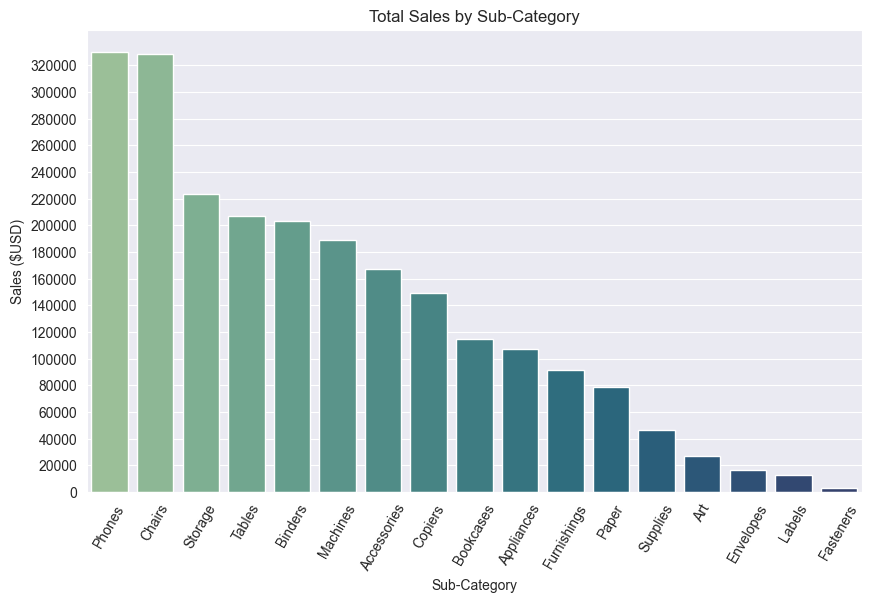

In [91]:
# store sub-category and sales columns in new dataframe
sales_subcat = df[['Sub-Category', 'Sales']]

# group by sub-category
# sum the total sales
# sort by sales in descending order 
total_sales_subcat = sales_subcat.groupby('Sub-Category').sum().sort_values(by='Sales', ascending=False)

# plot the total sales by sub-category
sns.barplot(data=total_sales_subcat, x='Sub-Category', y='Sales', hue='Sub-Category', palette='crest')
plt.xlabel('Sub-Category')
plt.xticks(rotation=60)
plt.title('Total Sales by Sub-Category')
plt.ylabel('Sales ($USD)')
plt.yticks(range(0, 340000, 20000))
plt.show()

## Total profit for each sub-category

Author: Tommy

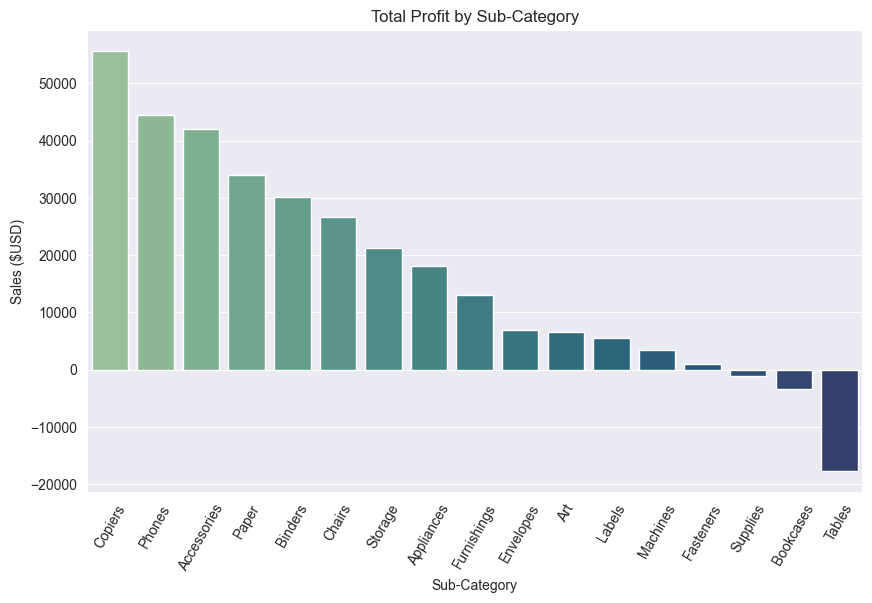

In [92]:
# store sub-category and profit columns in new dataframe
sales_subcat = df[['Sub-Category', 'Profit']]

# group by sub-category
# sum the total profit
# sort by sales in descending order 
total_sales_subcat = sales_subcat.groupby('Sub-Category').sum().sort_values(by='Profit', ascending=False)

# plot the total profit by sub-category
sns.barplot(data=total_sales_subcat, x='Sub-Category', y='Profit', hue='Sub-Category', palette='crest')
plt.xlabel('Sub-Category')
plt.xticks(rotation=60)
plt.title('Total Profit by Sub-Category')
plt.ylabel('Sales ($USD)')
plt.yticks(range(-20000, 60000, 10000))
plt.show()

## Total sales for each category
Author: Tommy

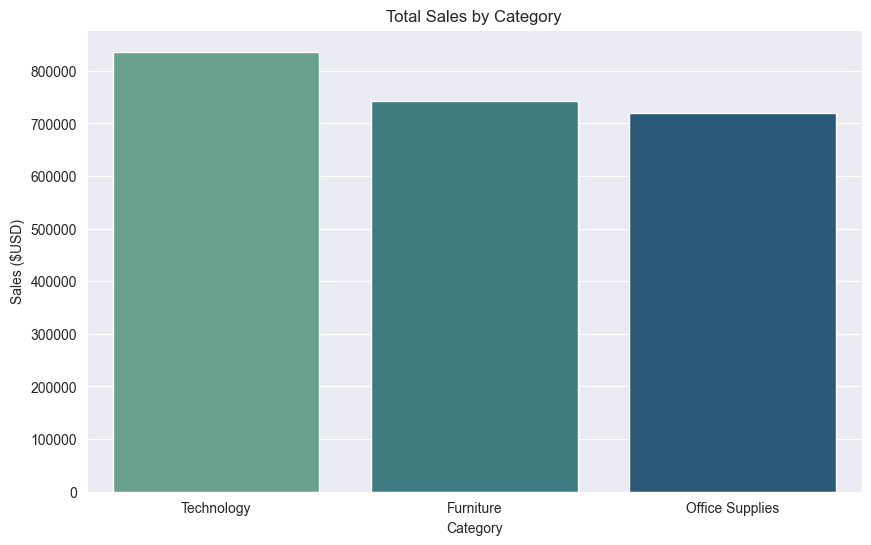

In [93]:
# store category and sales columns in new dataframe
sales_subcat = df[['Category', 'Sales']]

# group by category
# sum the total sales
# sort by sales in descending order 
total_sales_subcat = sales_subcat.groupby('Category').sum().sort_values(by='Sales', ascending=False)

# plot the total sales by category
sns.barplot(data=total_sales_subcat, x='Category', y='Sales', hue='Category', palette='crest')
plt.xlabel('Category')
plt.title('Total Sales by Category')
plt.ylabel('Sales ($USD)')
plt.show()

## Total profit for each category
Author: Tommy

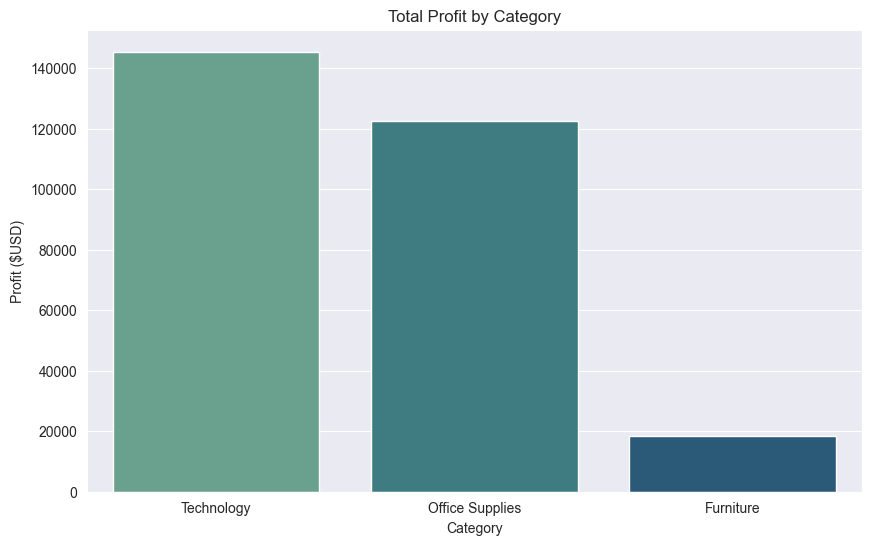

In [94]:
# store the category and profit columns in new dataframe
category_profit = df[['Category', 'Profit']]

# group by category
# sum total profit
# sort by profit in descending order
total_cat_profit = category_profit.groupby('Category').sum().sort_values(by='Profit', ascending=False)

# plot total profit by category
sns.barplot(data=total_cat_profit, x='Category', y='Profit', hue='Category', palette='crest', legend=False)
plt.xlabel('Category')
plt.ylabel('Profit ($USD)')
plt.title('Total Profit by Category')
plt.show()

## Top 15 cities in total sales

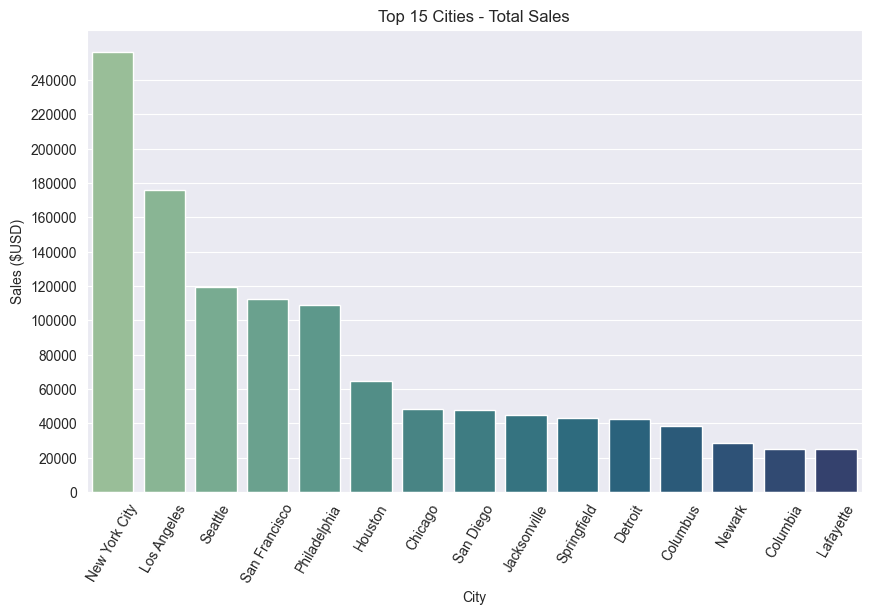

In [95]:
# store the city and sales columns in new dataframe
city_sales = df[['City', 'Sales']]

# group by city
# sum total sales
# sort by sales in descending order
# store the first 15 rows in new dataframe
top_city_sales = city_sales.groupby('City').sum().sort_values(by='Sales', ascending=False)[:15]

# plot top 15 cities in total sales
sns.barplot(data=top_city_sales, x='City', y='Sales', hue='City', palette='crest')
plt.xticks(rotation=60)
plt.title('Top 15 Cities - Total Sales')
plt.yticks(range(0, 250000, 20000))
plt.ylabel('Sales ($USD)')
plt.show()


## Top 15 cities in total profit
Author: Tommy

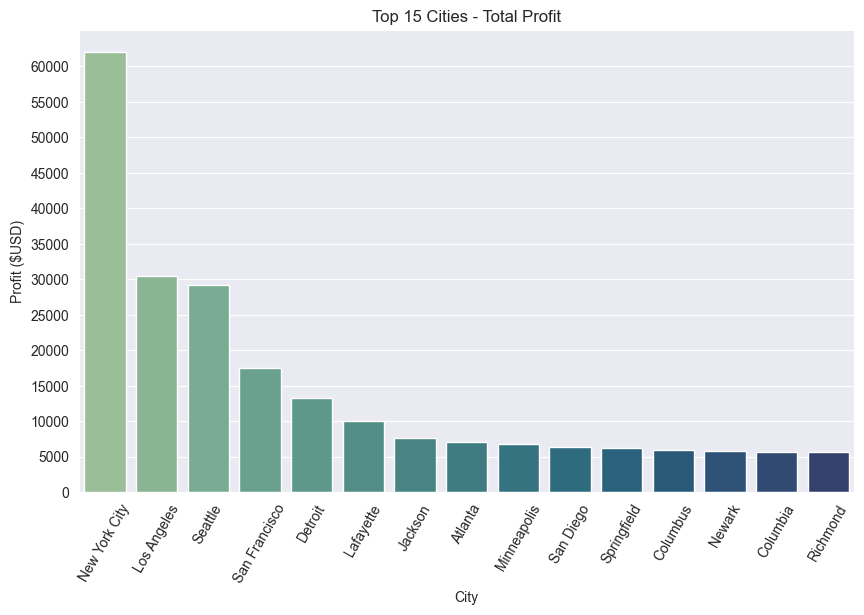

In [96]:
# store the city and profit columns in new dataframe
city_sales = df[['City', 'Profit']]

# group by city
# sum total profit
# sort by profit in descending ourder
# store the first 15 rows in new dataframe
top_city_sales = city_sales.groupby('City').sum().sort_values(by='Profit', ascending=False)[:15]

# plot top 15 cities in total profit
sns.barplot(data=top_city_sales, x='City', y='Profit', hue='City', palette='crest')
plt.xticks(rotation=60)
plt.title('Top 15 Cities - Total Profit')
plt.yticks(range(0, 65000, 5000))
plt.ylabel('Profit ($USD)')
plt.show()


## Top 15 states in total sales
Author: Tommy

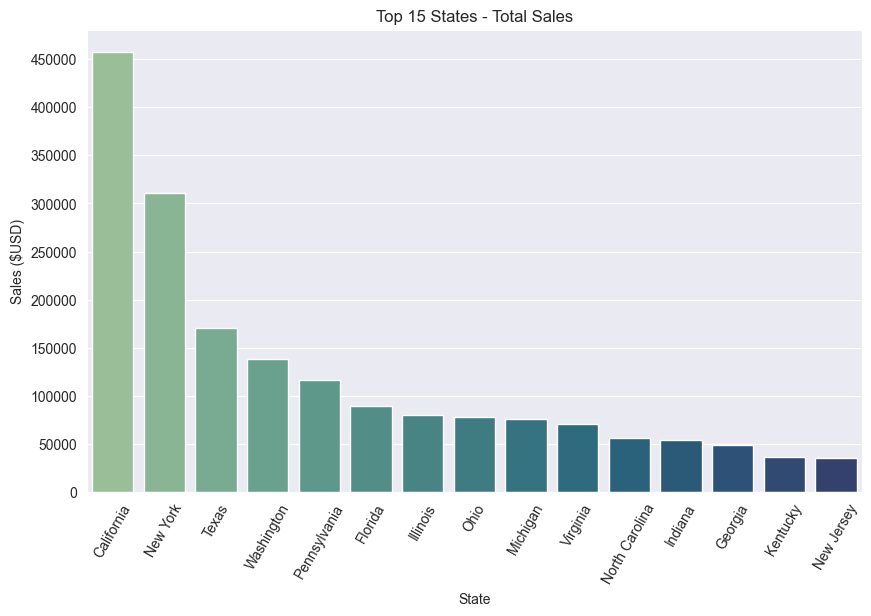

In [97]:
# store state and sales columns in new dataframe
city_sales = df[['State', 'Sales']]

# group by state
# sum total sales
# sort by sales in descending order
# store the first 15 rows in new dataframe
top_city_sales = city_sales.groupby('State').sum().sort_values(by='Sales', ascending=False)[:15]

# plot top 15 states in total sales
sns.barplot(data=top_city_sales, x='State', y='Sales', hue='State', palette='crest')
plt.xticks(rotation=60)
plt.title('Top 15 States - Total Sales')
plt.yticks(range(0, 500000, 50000))
plt.ylabel('Sales ($USD)')
plt.show()

## Top 15 states in total profit
Author: Tommy

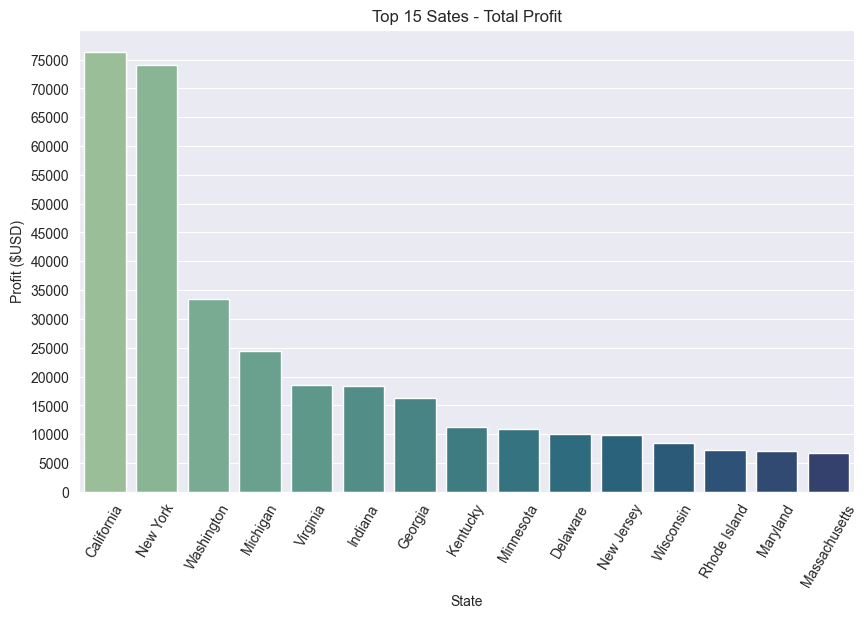

In [98]:
# store state and profit columns in new dataframe
state_sales = df[['State', 'Profit']]

# group by state
# sum total profit
# sort values by profit in descending order
# store first 15 rows in new dataframe
top_state_sales = state_sales.groupby('State').sum().sort_values(by='Profit', ascending=False)[:15]

# plot top 15 states in total profit
sns.barplot(data=top_state_sales, x='State', y='Profit', hue='State', palette='crest')
plt.xticks(rotation=60)
plt.title('Top 15 Sates - Total Profit')
plt.yticks(range(0, 80000, 5000))
plt.ylabel('Profit ($USD)')
plt.show()

## Total sales for each segment
Author: Tommy

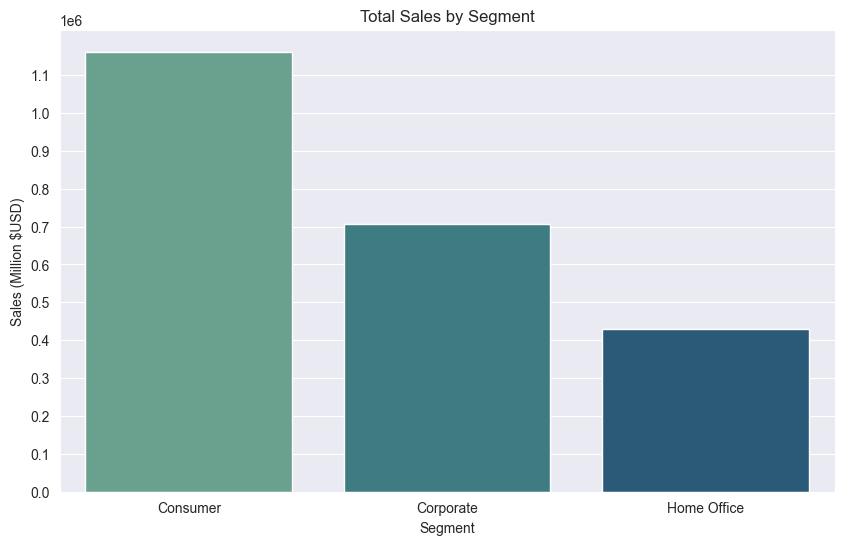

In [99]:
# store segment and sales columns in new dataframe
sales_subcat = df[['Segment', 'Sales']]

# group by segment
# sum the total sales
# sort by sales in descending order 
total_sales_subcat = sales_subcat.groupby('Segment').sum().sort_values(by='Sales', ascending=False)

# plot the total sales by segment
sns.barplot(data=total_sales_subcat, x='Segment', y='Sales', hue='Segment', palette='crest')
plt.xlabel('Segment')
plt.title('Total Sales by Segment')
plt.ylabel('Sales (Million $USD)')
plt.yticks(range(0, 1200000, 100000))
plt.show()

## Total profit for each segment
Author: Tommy

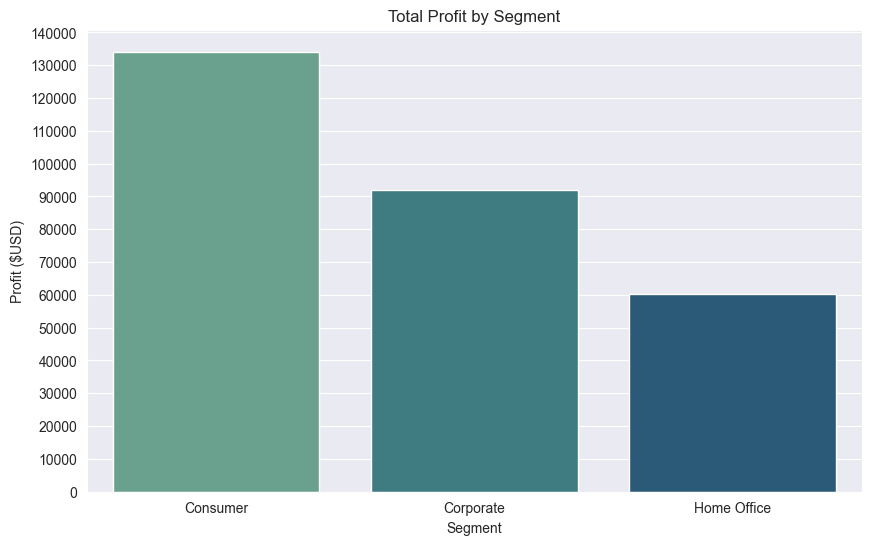

In [100]:
# store segment and profit columns in new dataframe
sales_subcat = df[['Segment', 'Profit']]

# group by segment
# sum the total profit
# sort by profit in descending order 
total_sales_subcat = sales_subcat.groupby('Segment').sum().sort_values(by='Profit', ascending=False)

# plot the total profit by segment
sns.barplot(data=total_sales_subcat, x='Segment', y='Profit', hue='Segment', palette='crest')
plt.xlabel('Segment')
# plt.xticks(rotation=60)
plt.title('Total Profit by Segment')
plt.ylabel('Profit ($USD)')
plt.yticks(range(0, 150000, 10000))
plt.show()